<a href="https://colab.research.google.com/github/yalex1402/AI_Course/blob/master/Search_Methods_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo 1: Solución de problemas mediante búsqueda**

**Integrantes:**
* Alejandro Gonzales Sanchez ***([Sanalegon](https://github.com/sanalegon))***
* Carlos Castro Godoy ***([CarlosCastroG](https://github.com/CarlosCastroG))***
* Yesid Garcia Lopez ***([Yalex1402](https://github.com/yalex1402))***





In [1]:
'''
    This class represents a node, that means it's the simplest part in a tree
'''
class Node():
    def __init__(self,node_description,cost=0):
        self.value = node_description
        self.parent = None
        self.cost = cost
        self.depth = 0
        self.child = []

'''
    This class contains all methods to create, return and search into a tree.
    It has uninformed search methods and informed search methods.
'''
class Tree():

    def __init__(self,node_description,cost=0):
        self.Node = Node(node_description,cost)
    
    def addEdge(self, node_description,cost=0):
        edge = Tree(node_description,cost)
        edge.Node.parent = self.Node
        edge.Node.cost += self.Node.cost
        edge.Node.depth = self.Node.depth + 1
        self.Node.child.append(edge)

    def getEdge(self, child_index):
        return self.Node.child[child_index]
    
    def BFS(self, goal):
        queue=[]
        queue.append(self)
        while(len(queue) != 0):
            node = queue.pop(0)
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                break
            number_childs = len(node.Node.childs)
            #Se debe llamar la Función Sucesión 
            for i in range(number_childs):
                queue.append(node.getEdge(i))
    
    def UCS(self, goal):
        queue=[]
        queue.append(self)
        while(len(queue) != 0):
            self.order_by_cost(queue)
            node = queue.pop(0)
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                break
            number_childs = len(node.Node.childs)
            #Se debe llamar la Función Sucesión
            for i in range(number_childs):
                queue.append(node.getEdge(i))

    def DFS(self, goal):
        stack = []
        stack.append(self)
        while(len(stack) != 0):
            node = stack.pop()
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                break
            number_childs = len(node.Node.childs)
            #Se debe llamar la Función Sucesión 
            for i in reversed(range(number_childs)):
                stack.append(node.getEdge(i))

    def DLS(self, goal, limit_to_search):
        stack = []
        stack.append(self)
        while(len(stack) != 0):
            node = stack.pop()
            if(node.Node.depth > limit_to_search):
                continue
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                return True
            number_childs = len(node.Node.childs)
            #Se debe llamar la Función Sucesión 
            for i in reversed(range(number_childs)):
                stack.append(node.getEdge(i))
        return False

    def IDS(self, goal, limit_to_search):
        while True:
            if self.DLS(goal, limit_to_search):
                break
            limit_to_search += 1 

    def order_by_cost(self, queue):
        i=0
        while i < len(queue) - 1:
            j= i + 1
            while j < len(queue):
                if queue[i].Node.cost > queue[j].Node.cost :
                    aux = queue[i]
                    queue[i] = queue[j]
                    queue[j] = aux
                j += 1
            i += 1

    def get_solution(self, node):
        if(node == None):
            return
        else:
            print("Node: " + str(node.value) + " - Cost: " + str(node.cost))
            self.get_solution(node.parent)

**Elementos a ubicar en la matriz:**
* **Player:** será representado por el *número 1*
* **Enemy:** será representado por el *número 2*
* **Obstacles:** será representado por el *número -1*
* **Empty Space:** será representado por el *número 0*

Un ejemplo claro se da en la siguiente imagen: 
 
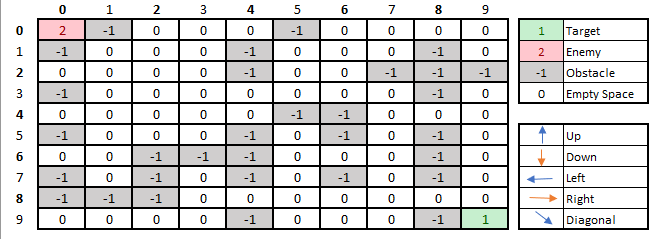

In [ ]:
import numpy as np
import random as rdn

#Generate Matrix m*n
def GenerateMatrix(nrows, ncolumns):
    matrix = []
    row=[]
    i = 0
    while i < nrows:
        j=0
        row=[]
        while j < ncolumns:
            if i==0 and j ==0 :
                row.append(2)
            elif i==nrows-1 and j==ncolumns-1:
                row.append(1)
            elif i%2==0 or j%2==0:
                row.append(rdn.randint(-1,0))
            else:
                row.append(0)
            j+=1
        matrix.append(row)
        i+=1
    return matrix

#Define if any position is into the valid positions of the matrix
def IsValidPosition(position, nrows, ncolumns):
    if (position["i"] >= 0 and position["i"] < nrows) and (position["j"] >= 0 and position["j"] < ncolumns):
        return True
    return False

def TryMoveToRight (column):
    column += 1
    return column

def TryMoveToLeft (column):
    column -= 1
    return column

def TryMoveToUp (row):
    row -= 1
    return row

def TryMoveToDown (row):
    row += 1
    return row

def TryMoveToDiagUpRight(row,column):
    pos = {"i":0, "j": 0}
    pos["i"] = TryMoveToUp(row)
    pos["j"] = TryMoveToRight(column)
    return pos

def TryMoveToDiagUpLeft(row,column):
    pos = {"i":0, "j": 0}
    pos["i"] = TryMoveToUp(row)
    pos["j"] = TryMoveToLeft(column)
    return pos

def TryMoveToDiagDownRight(row,column):
    pos = {"i":0, "j": 0}
    pos["i"] = TryMoveToDown(row)
    pos["j"] = TryMoveToRight(column)
    return pos

def TryMoveToDiagDownLeft(row,column):
    pos = {"i":0, "j": 0}
    pos["i"] = TryMoveToDown(row)
    pos["j"] = TryMoveToLeft(column)
    return pos

def MoveToUp(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]-1][enemyPosition["j"]]
    matrix[enemyPosition["i"]-1][enemyPosition["j"]] = aux
    return matrix

def MoveToDown(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]+1][enemyPosition["j"]]
    matrix[enemyPosition["i"]+1][enemyPosition["j"]] = aux
    return matrix

def MoveToRight(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]][enemyPosition["j"]+1]
    matrix[enemyPosition["i"]][enemyPosition["j"]+1] = aux
    return matrix

def MoveToLeft(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]][enemyPosition["j"]-1]
    matrix[enemyPosition["i"]][enemyPosition["j"]-1] = aux
    return matrix

def MoveToDiagUpRight(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]-1][enemyPosition["j"]+1]
    matrix[enemyPosition["i"]-1][enemyPosition["j"]+1] = aux
    return matrix

def MoveToDiagUpLeft(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]-1][enemyPosition["j"]-1]
    matrix[enemyPosition["i"]-1][enemyPosition["j"]-1] = aux
    return matrix

def MoveToDiagDownRight(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]+1][enemyPosition["j"]+1]
    matrix[enemyPosition["i"]+1][enemyPosition["j"]+1] = aux
    return matrix

def MoveToDiagDownLeft(matrix, enemyPosition):
    aux = matrix[enemyPosition["i"]][enemyPosition["j"]]
    matrix[enemyPosition["i"]][enemyPosition["j"]] = matrix[enemyPosition["i"]+1][enemyPosition["j"]-1]
    matrix[enemyPosition["i"]+1][enemyPosition["j"]-1] = aux
    return matrix


NUMBER_ROWS = 10
NUMBER_COLUMNS =10 
originalMatrix = GenerateMatrix(NUMBER_ROWS, NUMBER_COLUMNS)
print(np.matrix(originalMatrix), "\n")
print(np.matrix(MoveToDiagUpRight(np.copy(originalMatrix),{"i":1,"j":0})), "\n")
print(np.matrix(originalMatrix), "\n")


#PASOS A REALIZAR

#Validar si es mi estado objetivo
#Retornar solución
